# Foot Health Analysis: A Data-Driven Approach for Neuropathy and PAD

# The project has two parts 
1. Applying the machine learning models and findout the accuracy 
2.Image processing 

# The machine Learning part : 

# 1.Importing the libraries

In [10]:
# Importing packages
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from random import sample
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 2.Loading the dataset

In [11]:
# Define the directory where your images are located
image_dir = r'C:\Users\ADMIN\Downloads\Photos_2-20231024T153304Z-001\Photos_2'

# Load the Excel data
data = pd.read_excel(r'C:\Users\ADMIN\Downloads\Classification and temperature (3).xlsx')
print('Number of records in the file:', data.shape[0])
print('Number of attributes in the file:', data.shape[1])

Number of records in the file: 64
Number of attributes in the file: 13


In [12]:
df = pd.read_excel(r'C:\Users\ADMIN\Downloads\Classification and temperature (3).xlsx')
df.head()

Subject Number PAD Neuropathy  1st digit 2nd digit  3rd digit  4th digit  \
0        1 Right  No         No       26.7      27.1       26.7       26.3   
1         1 Left  No         No       25.5      24.7       24.3       24.1   
2        2 Right  No         No       26.7        26       25.7       25.6   
3         2 Left  No         No       26.7      26.3       26.3       26.3   
4        3 Right  no         No       21.9      21.9       22.0       22.5   

   5th digit  Average Toes  1st MTH  3rd MTH  5th MTH  Average Forefoot  
0       26.2         26.60     27.6     27.6     26.4         27.200000  
1       23.5         24.42     25.8     25.7     24.8         25.433333  
2       25.5         25.90     28.0     27.5     26.9         27.466667  
3       26.1         26.34     28.0     27.9     27.4         27.766667  
4       22.5         22.16     23.8     24.1     23.8         23.900000

In [8]:
df.tail()

Subject Number  PAD Neuropathy  1st digit 2nd digit  3rd digit  4th digit  \
59        30 Left  yes        Yes       26.7      27.1       27.5       27.2   
60       31 Right  yes        Yes       32.8      32.3       32.2       32.2   
61        31 Left  yes        Yes       33.2      32.8       32.9       33.0   
62       32 Right  yes        Yes       33.4      32.4       32.3       32.5   
63        32 Left  yes        Yes       32.6      31.8       32.0       32.1   

    5th digit  Average Toes  1st MTH  3rd MTH  5th MTH  Average Forefoot  
59       27.1         27.12     29.0     29.2     28.5         28.900000  
60       32.2         32.34     33.7     33.3     32.3         33.100000  
61       32.6         32.90     33.5     33.7     32.6         33.266667  
62       33.0         32.72     32.1     31.5     31.7         31.766667  
63       32.1         32.12     30.9     30.7     31.1         30.900000

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Subject Number    64 non-null     object 
 1   PAD               64 non-null     object 
 2   Neuropathy        64 non-null     object 
 3   1st digit         64 non-null     float64
 4   2nd digit         64 non-null     object 
 5   3rd digit         64 non-null     float64
 6   4th digit         64 non-null     float64
 7   5th digit         64 non-null     float64
 8   Average Toes      64 non-null     float64
 9   1st MTH           64 non-null     float64
 10  3rd MTH           64 non-null     float64
 11  5th MTH           64 non-null     float64
 12  Average Forefoot  64 non-null     float64
dtypes: float64(9), object(4)
memory usage: 6.6+ KB


In [14]:
df.describe()

1st digit  3rd digit  4th digit  5th digit  Average Toes    1st MTH  \
count  64.000000  64.000000  64.000000  64.000000     64.000000  64.000000   
mean   27.337500  27.026562  27.067187  27.110938     27.103906  28.603125   
std     3.159943   3.120096   3.061437   3.089312      3.079158   2.627267   
min    21.800000  21.900000  22.100000  22.100000     22.000000  23.500000   
25%    24.950000  24.650000  24.850000  25.075000     24.790000  26.675000   
50%    26.750000  26.550000  26.500000  26.550000     26.560000  28.650000   
75%    29.350000  29.100000  29.025000  28.950000     29.195000  30.900000   
max    33.800000  33.600000  33.700000  33.500000     33.600000  33.700000   

         3rd MTH    5th MTH  Average Forefoot  
count  64.000000  64.000000         64.000000  
mean   28.585938  28.225000         28.471354  
std     2.665468   2.645451          2.631989  
min    23.700000  23.700000         23.633333  
25%    26.575000  26.400000         26.558333  
50%    28.650000  28.100000         28.466667  
75%    30.725000  30.475000         30.708333  
max    33.700000  32.600000         33.266667

In [28]:
pad_df = df[df["PAD"]==1]
pad_df.head()

Subject Number  PAD  Neuropathy  1st digit  2nd digit  3rd digit  \
12        7 Right    1           0       26.1       25.9       25.9   
17         9 Left    1           0       29.0        NaN       27.9   
27        14 Left    1           0       29.1       28.3       28.8   
30       16 Right    1           1       31.1       31.1       31.6   
40       21 Right    1           0       26.6       27.0       26.2   

    4th digit  5th digit  Average Toes  1st MTH  3rd MTH  5th MTH  \
12       26.4       26.6         26.18     27.5     27.3     27.5   
17       28.0       28.1         28.25     30.6     30.3     30.0   
27       30.3       30.6         29.42     30.5     30.9     30.7   
30       31.5       30.3         31.12     31.3     31.7     31.1   
40       26.2       25.9         26.38     27.9     27.5     27.1   

    Average Forefoot  
12         27.433333  
17         30.300000  
27         30.700000  
30         31.366667  
40         27.500000

In [29]:
neuro_df = df[df["Neuropathy"]==1]
neuro_df.head()

Subject Number  PAD  Neuropathy  1st digit  2nd digit  3rd digit  \
25        13 Left    0           1       30.8       30.0       29.1   
30       16 Right    1           1       31.1       31.1       31.6   
45        23 Left    0           1       30.3       29.9       29.1   
50       26 Right    0           1       27.0       26.3       26.7   
51        26 Left    1           1       31.0       28.1       28.4   

    4th digit  5th digit  Average Toes  1st MTH  3rd MTH  5th MTH  \
25       29.1       29.2         29.64     31.0     31.2     31.0   
30       31.5       30.3         31.12     31.3     31.7     31.1   
45       28.6       27.7         29.12     31.4     30.7     29.9   
50       26.9       27.1         26.80     28.9     28.9     28.5   
51       28.3       28.0         28.76     30.6     30.1     29.3   

    Average Forefoot  
25         31.066667  
30         31.366667  
45         30.666667  
50         28.766667  
51         30.000000

In [30]:
normal_df = df[(df["PAD"]==0)&(df["Neuropathy"]==0)]
normal_df.head()

Subject Number  PAD  Neuropathy  1st digit  2nd digit  3rd digit  4th digit  \
0        1 Right    0           0       26.7       27.1       26.7       26.3   
1         1 Left    0           0       25.5       24.7       24.3       24.1   
2        2 Right    0           0       26.7       26.0       25.7       25.6   
3         2 Left    0           0       26.7       26.3       26.3       26.3   
4        3 Right    0           0       21.9       21.9       22.0       22.5   

   5th digit  Average Toes  1st MTH  3rd MTH  5th MTH  Average Forefoot  
0       26.2         26.60     27.6     27.6     26.4         27.200000  
1       23.5         24.42     25.8     25.7     24.8         25.433333  
2       25.5         25.90     28.0     27.5     26.9         27.466667  
3       26.1         26.34     28.0     27.9     27.4         27.766667  
4       22.5         22.16     23.8     24.1     23.8         23.900000

In [23]:
df["PAD"].unique()

array(['No', 'no', 'yes'], dtype=object)

In [24]:
df['PAD'] = df['PAD'].replace({"Yes":1, "yes":1, "No": 0, "no":0})
df["PAD"].unique()

array([0, 1], dtype=int64)

In [25]:
# df["Neuropathy"].describe()
df["Neuropathy"].unique()

array(['No', 'Yes', 'no'], dtype=object)

In [26]:
df['Neuropathy'] = df['Neuropathy'].replace({"Yes":1, "yes":1, "No": 0, "no":0})
df["Neuropathy"].unique()

array([0, 1], dtype=int64)

In [27]:
df = df.replace("amputation", np.nan)

In [32]:
new_df = df.dropna()

In [33]:
# df.columns
new_df["std_digits"] = new_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].values.std(axis=1)
new_df["min_digits"] = new_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].values.min(axis=1)
new_df["max_digits"] = new_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].values.max(axis=1)
new_df["mean_digits"] = new_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].values.mean(axis=1)
new_df["skewness_digits"] = new_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].skew(axis=1)
new_df["kurtosis_digits"] = new_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].kurt(axis=1)
new_df["variance_digits"] = new_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].values.var(axis=1)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10388\2511735898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["std_digits"] = new_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].values.std(axis=1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10388\2511735898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["min_digits"] = new_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].values.min(axis=1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10388\2511

In [34]:
new_df["std_mth"] = new_df[['1st MTH', '3rd MTH', '5th MTH']].values.std(axis=1)
new_df["min_mth"] = new_df[['1st MTH', '3rd MTH', '5th MTH']].values.min(axis=1)
new_df["max_mth"] = new_df[['1st MTH', '3rd MTH', '5th MTH']].values.max(axis=1)
new_df["mean_mth"] = new_df[['1st MTH', '3rd MTH', '5th MTH']].values.mean(axis=1)
new_df["skewness_mth"] = new_df[['1st MTH', '3rd MTH', '5th MTH']].skew(axis=1)
# required more than three value to calculate kurt
# new_df["kurtosis_mth"] = new_df[['1st MTH', '3rd MTH', '5th MTH']].kurt(axis=1)
new_df["variance_mth"] = new_df[['1st MTH', '3rd MTH', '5th MTH']].values.var(axis=1)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10388\3998765999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["std_mth"] = new_df[['1st MTH', '3rd MTH', '5th MTH']].values.std(axis=1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10388\3998765999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["min_mth"] = new_df[['1st MTH', '3rd MTH', '5th MTH']].values.min(axis=1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10388\3998765999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [35]:
# new_df = new_df[['Subject Number', 'PAD', 'Neuropathy', '1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit', 'std_digits', 'min_digits', 'max_digits', 'mean_digits', 'skewness_digits', 'kurtosis_digits', 'variance_digits', '1st MTH', '3rd MTH', '5th MTH', 'std_mth', 'min_mth', 'max_mth', 'mean_mth', 'skewness_mth', 'kurtosis_mth', 'variance_mth', 'Average Toes', 'Average Forefoot']]
new_df = new_df[['Subject Number', 'PAD', 'Neuropathy', '1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit', 'std_digits', 'min_digits', 'max_digits', 'mean_digits', 'skewness_digits', 'kurtosis_digits', 'variance_digits', '1st MTH', '3rd MTH', '5th MTH', 'std_mth', 'min_mth', 'max_mth', 'mean_mth', 'skewness_mth', 'variance_mth', 'Average Toes', 'Average Forefoot']]
new_df.head()

Subject Number  PAD  Neuropathy  1st digit  2nd digit  3rd digit  4th digit  \
0        1 Right    0           0       26.7       27.1       26.7       26.3   
1         1 Left    0           0       25.5       24.7       24.3       24.1   
2        2 Right    0           0       26.7       26.0       25.7       25.6   
3         2 Left    0           0       26.7       26.3       26.3       26.3   
4        3 Right    0           0       21.9       21.9       22.0       22.5   

   5th digit  std_digits  min_digits  ...  3rd MTH  5th MTH   std_mth  \
0       26.2    0.322490        26.2  ...     27.6     26.4  0.565685   
1       23.5    0.664530        23.5  ...     25.7     24.8  0.449691   
2       25.5    0.433590        25.5  ...     27.5     26.9  0.449691   
3       26.1    0.195959        26.1  ...     27.9     27.4  0.262467   
4       22.5    0.280000        21.9  ...     24.1     23.8  0.141421   

   min_mth  max_mth   mean_mth  skewness_mth  variance_mth  Average Toes  \
0     26.4     27.6  27.200000     -1.732051      0.320000         26.60   
1     24.8     25.8  25.433333     -1.668034      0.202222         24.42   
2     26.9     28.0  27.466667     -0.271355      0.202222         25.90   
3     27.4     28.0  27.766667     -1.545393      0.068889         26.34   
4     23.8     24.1  23.900000      1.732051      0.020000         22.16   

   Average Forefoot  
0         27.200000  
1         25.433333  
2         27.466667  
3         27.766667  
4         23.900000  

[5 rows x 26 columns]

In [36]:
new_df.columns

Index(['Subject Number', 'PAD', 'Neuropathy', '1st digit', '2nd digit',
       '3rd digit', '4th digit', '5th digit', 'std_digits', 'min_digits',
       'max_digits', 'mean_digits', 'skewness_digits', 'kurtosis_digits',
       'variance_digits', '1st MTH', '3rd MTH', '5th MTH', 'std_mth',
       'min_mth', 'max_mth', 'mean_mth', 'skewness_mth', 'variance_mth',
       'Average Toes', 'Average Forefoot'],
      dtype='object')

In [37]:
new_df.to_csv("processedDataForPADandNeuropathy.csv")

In [38]:
new_df.to_excel("processedDataForPADandNeuropathy.xlsx")

# Data Visualization

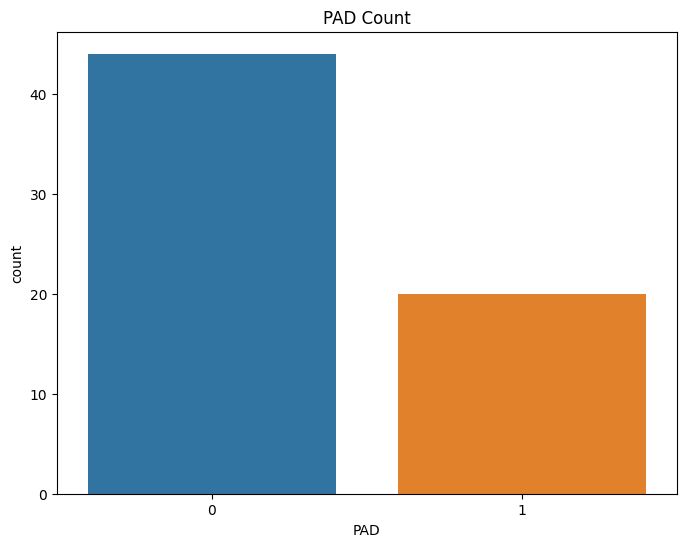

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named 'df'
# Replace 'PAD' and 'Neuropathy' with the actual column names that indicate the presence of PAD and Neuropathy
pad_target_column = 'PAD'
neuropathy_target_column = 'Neuropathy'

# Count plot for PAD
plt.figure(figsize=(8, 6))
sns.countplot(x=pad_target_column, data=df)
plt.title('PAD Count')
plt.show()



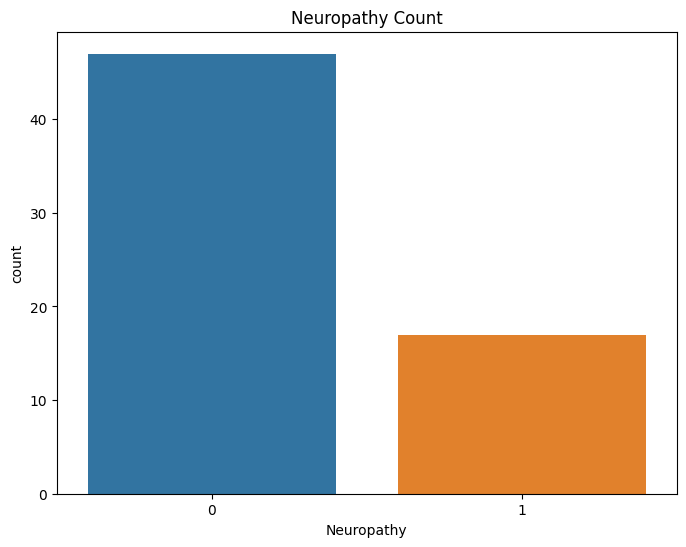

In [78]:
# Count plot for Neuropathy
plt.figure(figsize=(8, 6))
sns.countplot(x=neuropathy_target_column, data=df)
plt.title('Neuropathy Count')
plt.show()



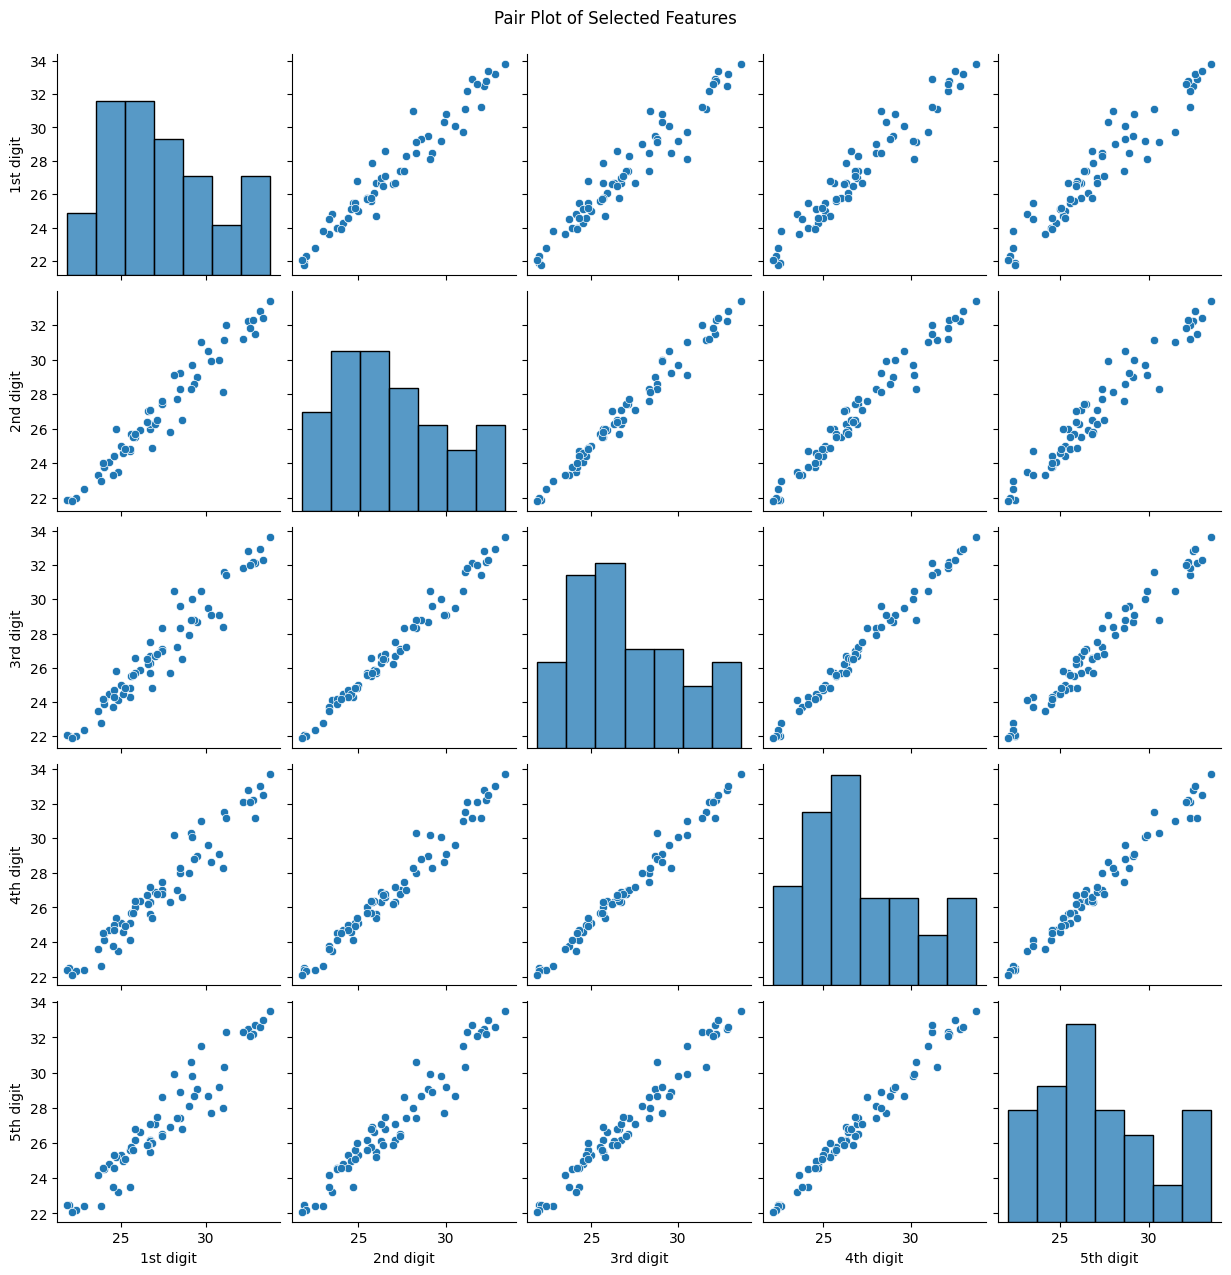

In [79]:
# Pair plot for selected features
selected_features = ['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']
sns.pairplot(df[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()



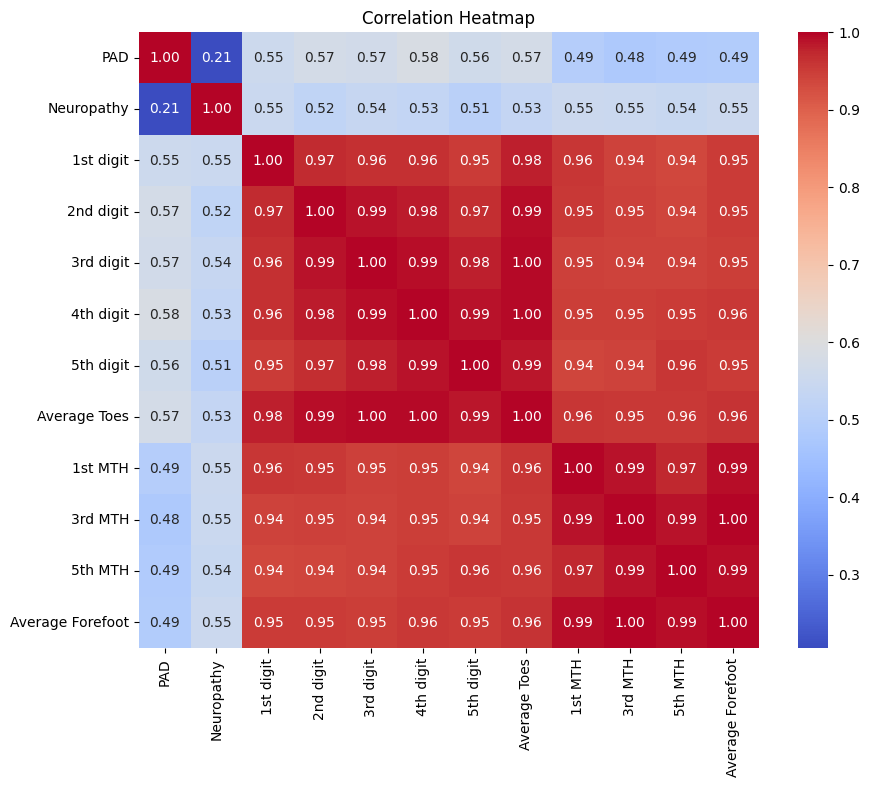

In [80]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

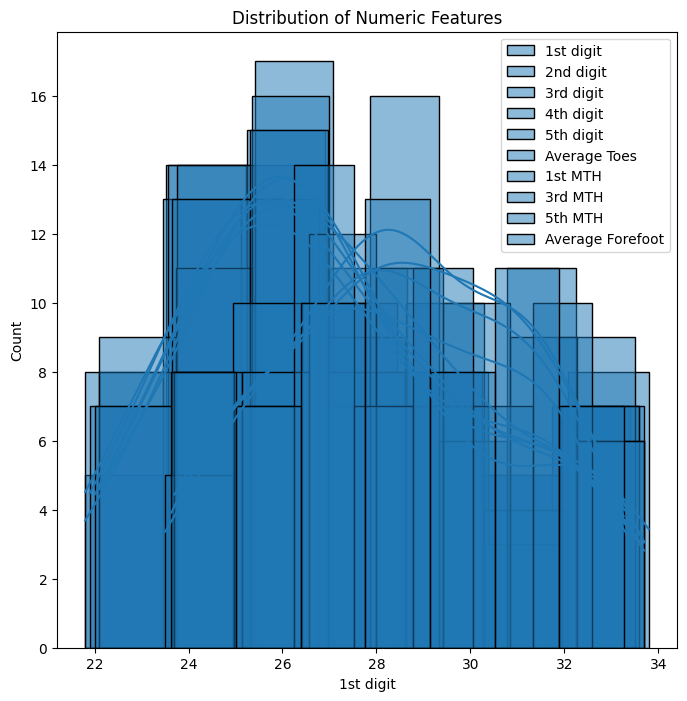

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(8, 8))
for feature in df.select_dtypes(include=['float64']).columns:
    sns.histplot(df[feature], kde=True, label=feature)

plt.title('Distribution of Numeric Features')
plt.legend()
plt.show()

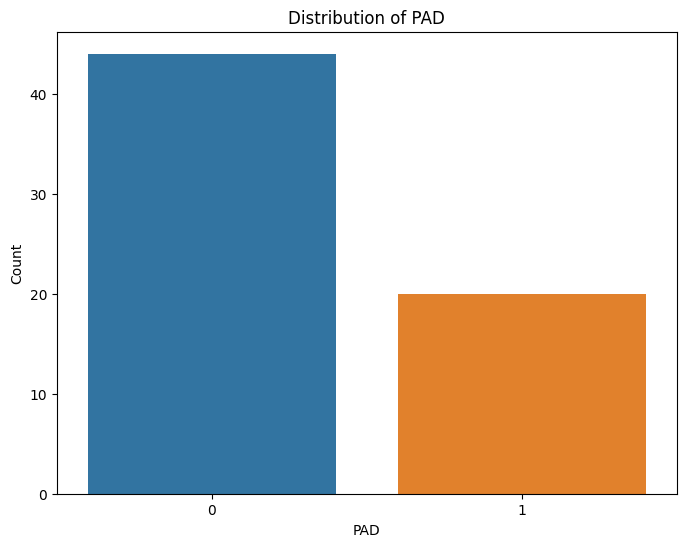

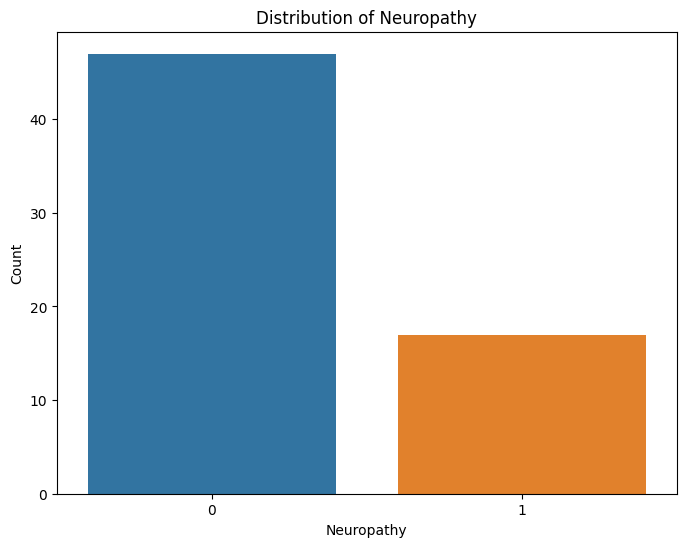

In [89]:
# Visualize the distribution of PAD
plt.figure(figsize=(8, 6))
sns.countplot(x='PAD', data=df)
plt.title('Distribution of PAD')
plt.xlabel('PAD')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of Neuropathy
plt.figure(figsize=(8, 6))
sns.countplot(x='Neuropathy', data=df)
plt.title('Distribution of Neuropathy')
plt.xlabel('Neuropathy')
plt.ylabel('Count')
plt.show()

# Testing Machine Learning  models :

# 1.SVM Model 

In [40]:
X =df [['Neuropathy']] # Features
y = df['PAD']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [97]:
def load_and_preprocess_images(folder_path, labels):
    images = []
    label_list = []

    for filename, label in zip(os.listdir(folder_path), labels):
        file_path = os.path.join(folder_path, filename)

        # Read the image
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        # Resize the image if needed
        img = cv2.resize(img, (400, 300))

        # Flatten the image to a 1D NumPy array
        img_flat = img.flatten()

        # Append the flattened image and its label to the lists
        images.append(img_flat)
        label_list.append(label)

    return np.array(images), np.array(label_list)

In [98]:
images_folder = r"C:\Users\ADMIN\Downloads\Photos_2-20231024T153304Z-001\Photos_2"
labels_list = [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1]
images, labels = load_and_preprocess_images(images_folder, labels_list)

In [99]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_test=X_train
y_test=y_train
from sklearn.svm import SVC
model = SVC()

In [101]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_report_result}")

Accuracy: 0.8
Confusion Matrix:
[[8 0]
 [5 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       0.00      0.00      0.00         5

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13



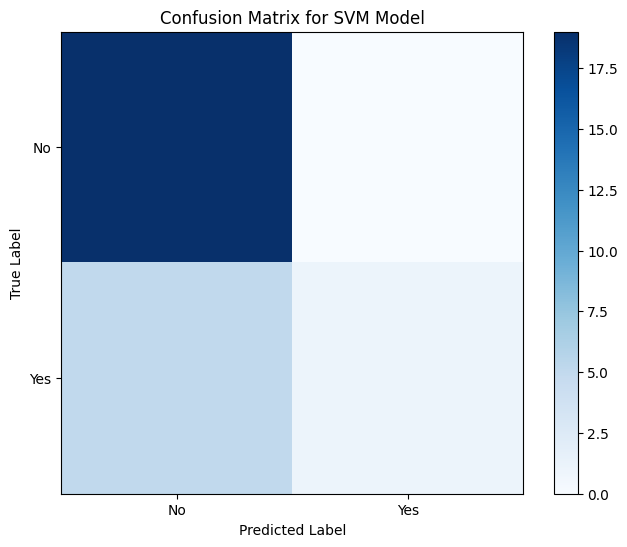

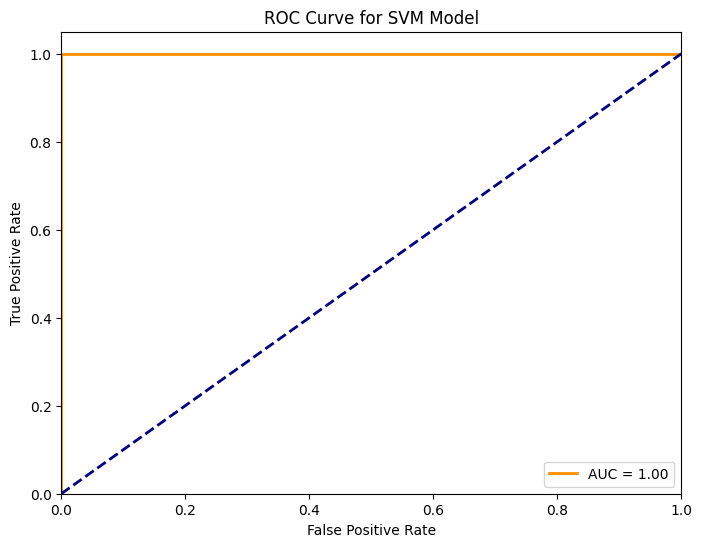

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Assuming you have an SVM model named 'model' and the test data X_test, y_test

# Make predictions on the test set
predictions_svm = model.predict(X_test)

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, predictions_svm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Model')
plt.colorbar()
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')

plt.legend(loc='lower right')
plt.show()

# 2.RANDOM FOREST

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split your dataset into X_train, X_test, y_train, y_test

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) based on your dataset

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_report_result}")

Accuracy: 1.0
Confusion Matrix:
[[8 0]
 [5 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       0.00      0.00      0.00         5

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13



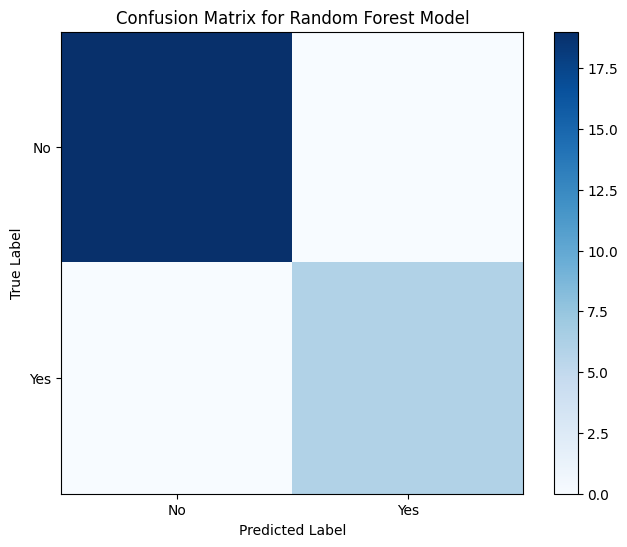

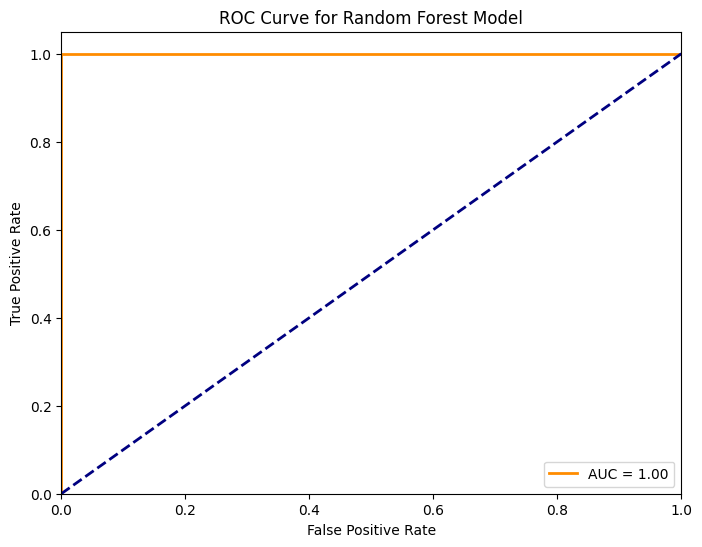

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Assuming you have a Random Forest model named 'rf_model' and the test data X_test, y_test

# Make predictions on the test set
predictions_rf = rf_model.predict(X_test)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Model')
plt.colorbar()
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')
plt.show()


# 3.LOGISTIC REGRESSION

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have already split your dataset into X_train, X_test, y_train, y_test

# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_logreg = logreg_model.predict(X_test)

# Evaluate the accuracy
accuracy_logreg = accuracy_score(y_test, predictions_logreg)
print(f"Accuracy: {accuracy_logreg}")

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, predictions_logreg)
print(f"Confusion Matrix:\n{conf_matrix_logreg}")

# Classification Report
class_report_logreg = classification_report(y_test, predictions_logreg)
print(f"Classification Report:\n{class_report_logreg}")

Accuracy: 1.0
Confusion Matrix:
[[19  0]
 [ 0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         6

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



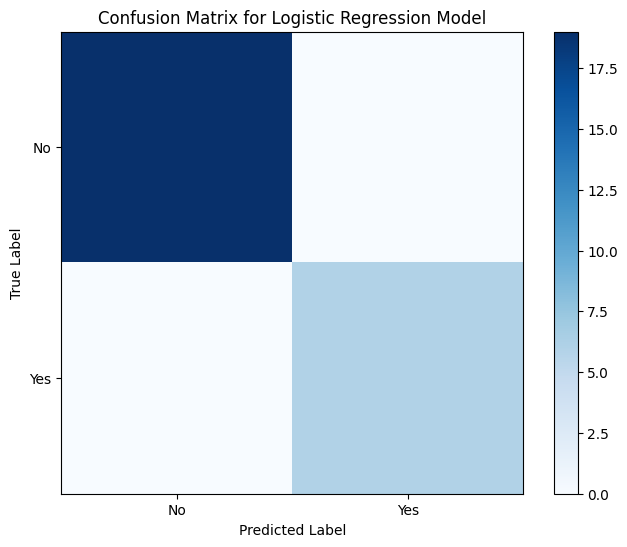

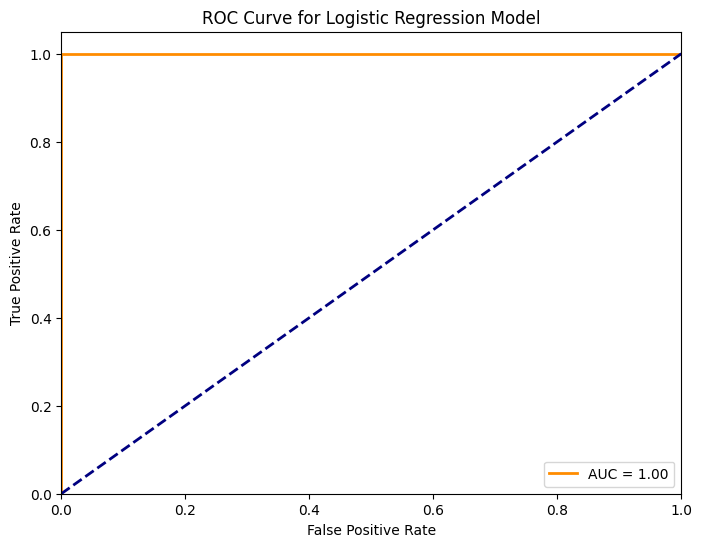

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Assuming you have a Logistic Regression model named 'logreg_model' and the test data X_test, y_test

# Make predictions on the test set
predictions_logreg = logreg_model.predict(X_test)

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, predictions_logreg)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_logreg, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.colorbar()
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logreg_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()


# Findout All possible ML model accuracys


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# List of classifiers
classifiers = [
    SVC(),
    GaussianNB(),
    BernoulliNB(),
    Perceptron(),
    MultinomialNB(),
    SGDClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]

# For PAD Using The original Dataset 

In [43]:
temp_df = df.dropna()
Xp = temp_df.drop(["Subject Number", "PAD", "Neuropathy"], axis=1).values
yp = temp_df["PAD"].values

In [44]:
# Split the data into training and testing sets
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# Xp_train = scaler.fit_transform(Xp_train)
# Xp_test = scaler.transform(Xp_test)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier()
]

# Train and evaluate each classifier
best_accuracy = 0
best_model = ''
for clf in classifiers:
    try:
        clf.fit(Xp_train, yp_train)
        yn_pred = clf.predict(Xp_test)
        accuracy = accuracy_score(yp_test, yn_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = str(clf.__class__.__name__)
        print(f"{clf.__class__.__name__}: Accuracy: {accuracy:.4f}")
    except Exception as e:
        print(f"{clf.__class__.__name__}: ERROR - {e}")

print("-" * 80)
print(best_model, " : ", best_accuracy)


RandomForestClassifier: Accuracy: 0.5385
SVC: Accuracy: 0.6154
KNeighborsClassifier: Accuracy: 0.6154
LogisticRegression: Accuracy: 0.6923
GaussianNB: Accuracy: 0.5385
DecisionTreeClassifier: Accuracy: 0.4615
--------------------------------------------------------------------------------
LogisticRegression  :  0.6923076923076923


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [48]:
temp_df = new_df.dropna()
Xp = temp_df.drop(["Subject Number", "PAD", "Neuropathy"], axis=1).values
yp = temp_df["PAD"].values
# Split the data into training and testing sets
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# Xp_train = scaler.fit_transform(Xp_train)
# Xp_test = scaler.transform(Xp_test)

# For PAD using New dataset by extending the features (mean,std deviation...)

In [49]:
# Train and evaluate each classifier
best_accuracy = 0
best_model = ''
for clf in classifiers:
    try:
        clf.fit(Xp_train, yp_train)
        yn_pred = clf.predict(Xp_test)
        accuracy = accuracy_score(yp_test, yn_pred)
        if accuracy>best_accuracy:
            best_accuracy = accuracy
            best_model = str(clf.__class__.__name__)
        print(f"{clf.__class__.__name__}: Accuracy: {accuracy:.4f}")
    except:
        print(f"{clf.__class__.__name__}: ERROR !!")

print("-"*80)
print(best_model, " : ", best_accuracy)

RandomForestClassifier: Accuracy: 0.3846
SVC: Accuracy: 0.5385
KNeighborsClassifier: Accuracy: 0.6923
LogisticRegression: Accuracy: 0.5385
GaussianNB: Accuracy: 0.5385
DecisionTreeClassifier: Accuracy: 0.4615
--------------------------------------------------------------------------------
KNeighborsClassifier  :  0.6923076923076923


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [50]:
# Train and evaluate each classifier
best_accuracy = 0
best_model = ''
for clf in classifiers:
    try:
        clf.fit(Xp_train, yp_train)
        yn_pred = clf.predict(Xp_test)
        accuracy = accuracy_score(yp_test, yn_pred)
        if accuracy>best_accuracy:
            best_accuracy = accuracy
            best_model = str(clf.__class__.__name__)
        print(f"{clf.__class__.__name__}: Accuracy: {accuracy:.4f}")
    except:
        print(f"{clf.__class__.__name__}: ERROR !!")

print("-"*80)
print(best_model, " : ", best_accuracy)

RandomForestClassifier: Accuracy: 0.5385
SVC: Accuracy: 0.5385
KNeighborsClassifier: Accuracy: 0.6923
LogisticRegression: Accuracy: 0.5385
GaussianNB: Accuracy: 0.5385
DecisionTreeClassifier: Accuracy: 0.4615
--------------------------------------------------------------------------------
KNeighborsClassifier  :  0.6923076923076923


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

# For Neuropathy using the original dataset

In [51]:
temp_df = new_df.dropna()
Xn = temp_df.drop(["Subject Number", "PAD", "Neuropathy"], axis=1).values
yn = temp_df["Neuropathy"].values
# Split the data into training and testing sets
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# Xn_train = scaler.fit_transform(Xn_train)
# Xn_test = scaler.transform(Xn_test)

In [52]:
# Train and evaluate each classifier
best_accuracy = 0
best_model = ''
for clf in classifiers:
    try:
        clf.fit(Xn_train, yn_train)
        yn_pred = clf.predict(Xn_test)
        accuracy = accuracy_score(yn_test, yn_pred)
        if accuracy>best_accuracy:
            best_accuracy = accuracy
            best_model = str(clf.__class__.__name__)
        print(f"{clf.__class__.__name__}: Accuracy: {accuracy:.4f}")
    except:
        print(f"{clf.__class__.__name__}: ERROR !!")

print("-"*80)
print(best_model, " : ", best_accuracy)

RandomForestClassifier: Accuracy: 0.6154
SVC: Accuracy: 0.6923
KNeighborsClassifier: Accuracy: 0.6154
LogisticRegression: Accuracy: 0.7692
GaussianNB: Accuracy: 0.6923
DecisionTreeClassifier: Accuracy: 0.6154
--------------------------------------------------------------------------------
LogisticRegression  :  0.7692307692307693


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

# For Neuropathy using new dataset by extended the features

In [53]:
temp_df = df.dropna()
Xn = temp_df.drop(["Subject Number", "PAD", "Neuropathy"], axis=1).values
yn = temp_df["Neuropathy"].values
# Split the data into training and testing sets
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# Xn_train = scaler.fit_transform(Xn_train)
# Xn_test = scaler.transform(Xn_test)
# Train and evaluate each classifier
best_accuracy = 0
best_model = ''
for clf in classifiers:
    try:
        clf.fit(Xn_train, yn_train)
        yn_pred = clf.predict(Xn_test)
        accuracy = accuracy_score(yn_test, yn_pred)
        if accuracy>best_accuracy:
            best_accuracy = accuracy
            best_model = str(clf.__class__.__name__)
        print(f"{clf.__class__.__name__}: Accuracy: {accuracy:.4f}")
    except:
        print(f"{clf.__class__.__name__}: ERROR !!")

print("-"*80)
print(best_model, " : ", best_accuracy)

RandomForestClassifier: Accuracy: 0.5385
SVC: Accuracy: 0.6923
KNeighborsClassifier: Accuracy: 0.6923
LogisticRegression: Accuracy: 0.7692
GaussianNB: Accuracy: 0.6923
DecisionTreeClassifier: Accuracy: 0.6154
--------------------------------------------------------------------------------
LogisticRegression  :  0.7692307692307693


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

# statistical Analysis on features(Extended)

# Correlation for The PAD

In [54]:
for col in df.columns:
    try:
        print(col, " : ", df["PAD"].corr(df[col]))
    except:
        pass

PAD  :  1.0
Neuropathy  :  0.2051226984624274
1st digit  :  0.5542782451661104
2nd digit  :  0.5721431173879842
3rd digit  :  0.5680948920969323
4th digit  :  0.5843902135925828
5th digit  :  0.5628951888100387
Average Toes  :  0.5736961548773007
1st MTH  :  0.49449706953208117
3rd MTH  :  0.47904479066552214
5th MTH  :  0.4854789470587569
Average Forefoot  :  0.4889033533572057


In [55]:
# for the new dataset 
for col in new_df.columns:
    try:
        print(col, " : ", new_df["PAD"].corr(new_df[col]))
    except:
        pass

PAD  :  1.0
Neuropathy  :  0.2238577114846129
1st digit  :  0.5527437118143538
2nd digit  :  0.5721431173879842
3rd digit  :  0.5718810722687082
4th digit  :  0.5879493699449042
5th digit  :  0.5657229534256022
std_digits  :  0.16482590418906637
min_digits  :  0.5809159207686926
max_digits  :  0.582433077294626
mean_digits  :  0.5756358513524913
skewness_digits  :  0.008772500807033587
kurtosis_digits  :  0.1320202538013529
variance_digits  :  0.164562240732584
1st MTH  :  0.4872796453227377
3rd MTH  :  0.4736833981005909
5th MTH  :  0.47972144793313665
std_mth  :  0.059105445700165606
min_mth  :  0.47960300125054145
max_mth  :  0.4808691039972462
mean_mth  :  0.4827701852671851
skewness_mth  :  -0.17362597517356854
variance_mth  :  -0.028462124460597
Average Toes  :  0.5756358513524913
Average Forefoot  :  0.48277018516875797


# Correlation for Neuropathy

In [56]:
for col in df.columns:
    try:
        print(col, " : ", df["Neuropathy"].corr(df[col]))
    except:
        pass

PAD  :  0.2051226984624274
Neuropathy  :  1.0
1st digit  :  0.5468559278102618
2nd digit  :  0.5239786957814144
3rd digit  :  0.5399652994223227
4th digit  :  0.5282908094050536
5th digit  :  0.5068602229409321
Average Toes  :  0.5333077947514968
1st MTH  :  0.5503000684972678
3rd MTH  :  0.5476596445404481
5th MTH  :  0.5428528184747817
Average Forefoot  :  0.5498559626507934


In [57]:
for col in new_df.columns:
    try:
        print(col, " : ", new_df["Neuropathy"].corr(new_df[col]))
    except:
        pass
        

PAD  :  0.2238577114846129
Neuropathy  :  1.0
1st digit  :  0.5547487337752035
2nd digit  :  0.5239786957814144
3rd digit  :  0.544567514091003
4th digit  :  0.5331533189574709
5th digit  :  0.5118340438765108
std_digits  :  0.23413167701740695
min_digits  :  0.5252885500905115
max_digits  :  0.5460211171387984
mean_digits  :  0.5390394359540527
skewness_digits  :  -0.14972286826584935
kurtosis_digits  :  0.2863609823387953
variance_digits  :  0.24010615446201317
1st MTH  :  0.5618437733497246
3rd MTH  :  0.5573050250668736
5th MTH  :  0.5529028679918863
std_mth  :  0.14670453300127403
min_mth  :  0.5528187805976484
max_mth  :  0.56519282091811
mean_mth  :  0.560330492749821
skewness_mth  :  0.02465252292478606
variance_mth  :  0.07731197398697773
Average Toes  :  0.5390394359540527
Average Forefoot  :  0.56033049277713


# Standard Deviation for toes 

In [58]:
std_deviation_averages = df[['Average Toes', 'Average Forefoot']].std()
std_deviation_averages

Average Toes        3.079158
Average Forefoot    2.631989
dtype: float64

In [59]:
std_deviation_digits_all_categories = pd.DataFrame(index=['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit'], 
             data={
                 "FULL": df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].std(),
                 "PAD": pad_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].std(),
                 "Neuropathy": neuro_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].std(),
                 "Normal": normal_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].std()
             }
            )

std_deviation_digits_all_categories
# std_deviation_digits_all_categories.plot()

FULL       PAD  Neuropathy    Normal
1st digit  3.159943  2.658309    2.495967  1.998012
2nd digit  3.139022  2.666261    2.263310  1.956880
3rd digit  3.120096  2.593773    2.291416  1.895208
4th digit  3.061437  2.611715    2.300799  1.798543
5th digit  3.089312  2.654708    2.407143  1.840040

# For MTH 

In [60]:
std_deviation_mth_all_categories = pd.DataFrame(index=['1st MTH','3rd MTH','5th MTH'], 
             data={
                 "FULL": df[['1st MTH','3rd MTH','5th MTH']].std(),
                 "PAD": pad_df[['1st MTH','3rd MTH','5th MTH']].std(),
                 "Neuropathy": neuro_df[['1st MTH','3rd MTH','5th MTH']].std(),
                 "Normal": normal_df[['1st MTH','3rd MTH','5th MTH']].std()
             }
            )

std_deviation_mth_all_categories

FULL       PAD  Neuropathy    Normal
1st MTH  2.627267  1.978377    1.596434  1.968888
3rd MTH  2.665468  1.950783    1.607588  2.025788
5th MTH  2.645451  1.848549    1.689109  1.932595

# Minimum on toes

In [61]:
min_averagestoes = df[['Average Toes', 'Average Forefoot']].min()
min_averagestoes

Average Toes        22.000000
Average Forefoot    23.633333
dtype: float64

# For Digits 

In [62]:
minimum_mth_all_categories = pd.DataFrame(index=['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit'], 
             data={
                 "FULL": df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].min(),
                 "PAD": pad_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].min(),
                 "Neuropathy": neuro_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].min(),
                 "Normal": normal_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].min()
             }
            )

minimum_mth_all_categories

FULL   PAD  Neuropathy  Normal
1st digit  21.8  25.8        26.5    21.8
2nd digit  21.8  25.7        26.3    21.8
3rd digit  21.9  25.9        26.5    21.9
4th digit  22.1  26.2        26.7    22.1
5th digit  22.1  25.9        25.9    22.1

# For MTH

In [63]:
minimum_mth_all_categories = pd.DataFrame(index=['1st MTH','3rd MTH','5th MTH'], 
             data={
                 "FULL": df[['1st MTH','3rd MTH','5th MTH']].min(),
                 "PAD": pad_df[['1st MTH','3rd MTH','5th MTH']].min(),
                 "Neuropathy": neuro_df[['1st MTH','3rd MTH','5th MTH']].min(),
                 "Normal": normal_df[['1st MTH','3rd MTH','5th MTH']].min()
             }
            )

minimum_mth_all_categories

FULL   PAD  Neuropathy  Normal
1st MTH  23.5  27.5        28.2    23.5
3rd MTH  23.7  27.3        28.1    23.7
5th MTH  23.7  27.1        27.2    23.7

In [64]:
# Mean for toe
mean_averagestoes = df[['Average Toes', 'Average Forefoot']].mean()
mean_averagestoes

Average Toes        27.103906
Average Forefoot    28.471354
dtype: float64

In [65]:
# mean for digits 
mean_digits_all_categories = pd.DataFrame(index=['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit'], 
             data={
                 "FULL": df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].mean(),
                 "PAD": pad_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].mean(),
                 "Neuropathy": neuro_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].mean(),
                 "Normal": normal_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].mean()
             }
            )

mean_digits_all_categories

FULL        PAD  Neuropathy     Normal
1st digit  27.337500  29.915000   30.188235  25.297143
2nd digit  26.957143  29.668421   29.641176  24.934286
3rd digit  27.026562  29.635000   29.805882  24.962857
4th digit  27.067187  29.700000   29.735294  25.037143
5th digit  27.110938  29.670000   29.694118  25.088571

In [66]:
# for MTH
mean_mth_all_categories = pd.DataFrame(index=['1st MTH','3rd MTH','5th MTH'], 
             data={
                 "FULL": df[['1st MTH','3rd MTH','5th MTH']].mean(),
                 "PAD": pad_df[['1st MTH','3rd MTH','5th MTH']].mean(),
                 "Neuropathy": neuro_df[['1st MTH','3rd MTH','5th MTH']].mean(),
                 "Normal": normal_df[['1st MTH','3rd MTH','5th MTH']].mean()
             }
            )

mean_mth_all_categories

FULL     PAD  Neuropathy     Normal
1st MTH  28.603125  30.515   30.988235  26.937143
3rd MTH  28.585938  30.465   30.994118  26.902857
5th MTH  28.225000  30.115   30.594118  26.508571

In [67]:
# skewness for toes
skewness_averagestoes = df[['Average Toes', 'Average Forefoot']].skew()
skewness_averagestoes

Average Toes        0.363335
Average Forefoot   -0.045525
dtype: float64

In [68]:
# skewness for kurtosis 
skewness_digits_all_categories = pd.DataFrame(index=['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit'], 
             data={
                 "FULL": df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].skew(),
                 "PAD": pad_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].skew(),
                 "Neuropathy": neuro_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].skew(),
                 "Normal": normal_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].skew()
             }
            )

skewness_digits_all_categories

FULL       PAD  Neuropathy    Normal
1st digit  0.326927 -0.121381   -0.224943  0.209800
2nd digit  0.325643 -0.194811   -0.214644  0.292046
3rd digit  0.366855 -0.026902   -0.183367  0.326342
4th digit  0.424424 -0.015816   -0.066013  0.286043
5th digit  0.427843 -0.041905    0.052486  0.216194

In [70]:
# kurtosis for toe
kurtosis_averagestoes = df[['Average Toes', 'Average Forefoot']].kurt()
kurtosis_averagestoes
# kurtosis for digits 
kurtosis_digits_all_categories = pd.DataFrame(index=['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit'], 
             data={
                 "FULL": df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].kurt(),
                 "PAD": pad_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].kurt(),
                 "Neuropathy": neuro_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].kurt(),
                 "Normal": normal_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].kurt()
             }
            )

kurtosis_digits_all_categories



FULL       PAD  Neuropathy    Normal
1st digit -0.696202 -1.320023   -1.543306 -0.361829
2nd digit -0.837782 -1.636597   -1.416694 -0.536165
3rd digit -0.749181 -1.534825   -1.630799 -0.301831
4th digit -0.670755 -1.621869   -1.665198 -0.223927
5th digit -0.622438 -1.649794   -1.583831 -0.214750

In [71]:
# kurtosis for MTH
kurtosis_mth_all_categories = pd.DataFrame(index=['1st MTH','3rd MTH','5th MTH'], 
             data={
                 "FULL": df[['1st MTH','3rd MTH','5th MTH']].kurt(),
                 "PAD": pad_df[['1st MTH','3rd MTH','5th MTH']].kurt(),
                 "Neuropathy": neuro_df[['1st MTH','3rd MTH','5th MTH']].kurt(),
                 "Normal": normal_df[['1st MTH','3rd MTH','5th MTH']].kurt()
             }
            )

kurtosis_mth_all_categories

FULL       PAD  Neuropathy    Normal
1st MTH -0.810855 -1.122837   -0.682380 -0.690494
3rd MTH -0.923974 -1.055969   -0.802219 -0.942086
5th MTH -1.071364 -1.331669   -0.930883 -0.818957

In [72]:
# Variance 
variance_averagestoes = df[['Average Toes', 'Average Forefoot']].var()
variance_averagestoes

Average Toes        9.481211
Average Forefoot    6.927367
dtype: float64

In [73]:
# for Digits 
variance_digits_all_categories = pd.DataFrame(index=['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit'], 
             data={
                 "FULL": df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].var(),
                 "PAD": pad_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].var(),
                 "Neuropathy": neuro_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].var(),
                 "Normal": normal_df[['1st digit', '2nd digit', '3rd digit', '4th digit', '5th digit']].var()
             }
            )

variance_digits_all_categories

FULL       PAD  Neuropathy    Normal
1st digit  9.985238  7.066605    6.229853  3.992050
2nd digit  9.853456  7.108947    5.122574  3.829378
3rd digit  9.734998  6.727658    5.250588  3.591815
4th digit  9.372398  6.821053    5.293676  3.234756
5th digit  9.543847  7.047474    5.794338  3.385748

In [74]:
# for MTH 
variance_mth_all_categories = pd.DataFrame(index=['1st MTH','3rd MTH','5th MTH'], 
             data={
                 "FULL": df[['1st MTH','3rd MTH','5th MTH']].var(),
                 "PAD": pad_df[['1st MTH','3rd MTH','5th MTH']].var(),
                 "Neuropathy": neuro_df[['1st MTH','3rd MTH','5th MTH']].var(),
                 "Normal": normal_df[['1st MTH','3rd MTH','5th MTH']].var()
             }
            )

variance_mth_all_categories

FULL       PAD  Neuropathy    Normal
1st MTH  6.902530  3.913974    2.548603  3.876521
3rd MTH  7.104720  3.805553    2.584338  4.103815
5th MTH  6.998413  3.417132    2.853088  3.734924